<a href="https://colab.research.google.com/github/Shreyaaa-11/UnderstandingPCA/blob/main/UnderstandingPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

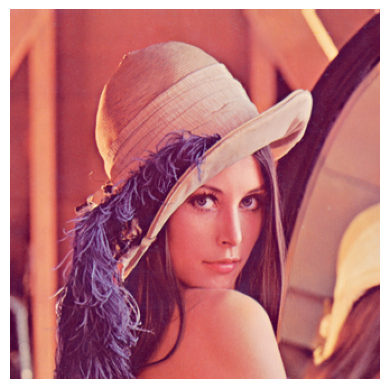

In [2]:
# We are reading the image of lenna and displaying it.

from PIL import Image
import matplotlib.pyplot as plt


img = Image.open('Lenna_Image.png')
plt.imshow(img)
plt.axis('off')
plt.show()



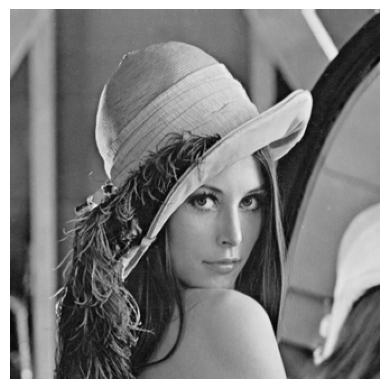

In [8]:
#converting the RBG image to grayscale image as it is easier to work with grayscale image as it includes only one channel.

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('Lenna_Image.png')

# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the grayscale image to a NumPy array. Image is a matrix.
img_array = np.array(img_gray)

# Display the grayscale image using Matplotlib
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()

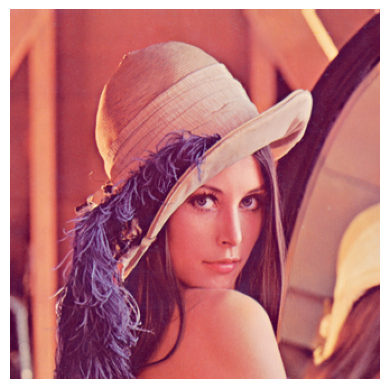

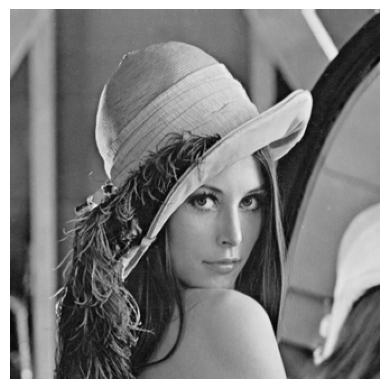

Principal Components:


array([[ 0.04137198,  0.04204764,  0.04210789, ..., -0.08304514,
        -0.08061904, -0.0785032 ],
       [ 0.02741862,  0.02391355,  0.01781595, ...,  0.11877674,
         0.12171478,  0.12274029],
       [-0.04771322, -0.0460317 , -0.04217897, ...,  0.03889026,
         0.03574332,  0.03006018],
       [-0.0028157 , -0.00474325, -0.0032766 , ..., -0.03712578,
        -0.03997413, -0.04467295],
       [ 0.13528657,  0.13326458,  0.12971075, ..., -0.03609878,
        -0.0341541 , -0.03244933]])

In [10]:
 #We are extracting only 5 important feautures from image. ( Getting the 5 principal components/feautures.)

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

img = Image.open('Lenna_Image.png')
plt.imshow(img)
plt.axis('off')
plt.show()

img = Image.open('Lenna_Image.png')

# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the grayscale image to a NumPy array
img_array = np.array(img_gray)

# Display the grayscale image using Matplotlib
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()

# Flatten the image array for PCA
img_flat = img_array.reshape(-1, 1)

# Apply PCA to extract 5 principal components
pca = PCA(n_components=5)
pca.fit(img_array)
principal_components = pca.components_

# Display the principal components (optional)
print("Principal Components:")
principal_components


Principal Components:
[[ 0.04137198  0.04204764  0.04210789 ... -0.08304514 -0.08061904
  -0.0785032 ]
 [ 0.02741862  0.02391355  0.01781595 ...  0.11877674  0.12171478
   0.12274029]
 [-0.04771322 -0.0460317  -0.04217897 ...  0.03889026  0.03574332
   0.03006018]
 [-0.0028157  -0.00474325 -0.0032766  ... -0.03712578 -0.03997413
  -0.04467295]
 [ 0.13528657  0.13326458  0.12971075 ... -0.03609878 -0.0341541
  -0.03244933]]


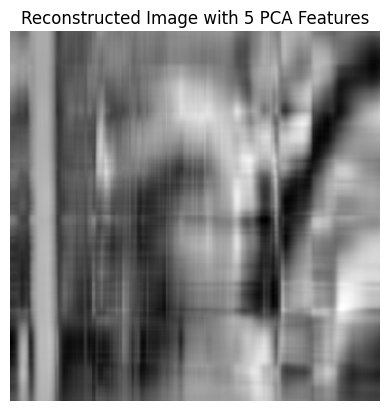

In [13]:
#Now we plot the image or reconstruct the image using the 5 principal components.

# Apply PCA to extract 5 principal components
pca = PCA(n_components=5)
pca.fit(img_array)  # Reshape for PCA
principal_components = pca.components_

# Display the principal components (optional)
print("Principal Components:")
print(principal_components)

# Reconstruct the image using the first 5 principal components:
projected_data = pca.transform(img_array)
reconstructed_data = pca.inverse_transform(projected_data)
reconstructed_image = reconstructed_data.reshape(img_array.shape)

# Plot the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')
plt.title('Reconstructed Image with 5 PCA Features')
plt.show()

Principal Components:
[[ 0.04137198  0.04204764  0.04210789 ... -0.08304514 -0.08061904
  -0.0785032 ]
 [ 0.02741862  0.02391355  0.01781595 ...  0.11877674  0.12171478
   0.12274029]
 [-0.04771322 -0.0460317  -0.04217897 ...  0.03889026  0.03574332
   0.03006018]
 ...
 [-0.06760126 -0.07154781 -0.08203413 ...  0.10097896  0.09145277
   0.08317151]
 [ 0.06334459  0.06399725  0.06320416 ...  0.01159253  0.01618435
   0.02251595]
 [ 0.00629489  0.00632802  0.01042076 ...  0.03209282  0.02596837
   0.0178878 ]]


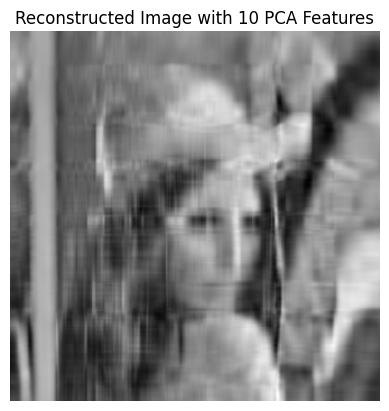

In [20]:
#plot the reconstructed image for 10 feautures with respect to img_array.

# Apply PCA to extract 10 principal components
pca = PCA(n_components=10)
pca.fit(img_array)  # Reshape for PCA
principal_components = pca.components_

# Display the principal components (optional)
print("Principal Components:")
print(principal_components)

# Reconstruct the image using the first 10 principal components:
projected_data = pca.transform(img_array)
reconstructed_data = pca.inverse_transform(projected_data)
reconstructed_image = reconstructed_data.reshape(img_array.shape)

# Plot the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')
plt.title('Reconstructed Image with 10 PCA Features')
plt.show()

In [18]:
#calculate the MSE for each of the components ranging from 1 to 329 in a for loop with respect to img_array, finally append all those values in a mse list.

mse_list = []
for i in range(1, 329):
    pca = PCA(n_components=i)
    pca.fit(img_array)
    principal_components = pca.components_
    projected_data = pca.transform(img_array)
    reconstructed_data = pca.inverse_transform(projected_data)
    reconstructed_image = reconstructed_data.reshape(img_array.shape)
    mse = np.mean((img_array - reconstructed_image) ** 2)
    mse_list.append(mse)

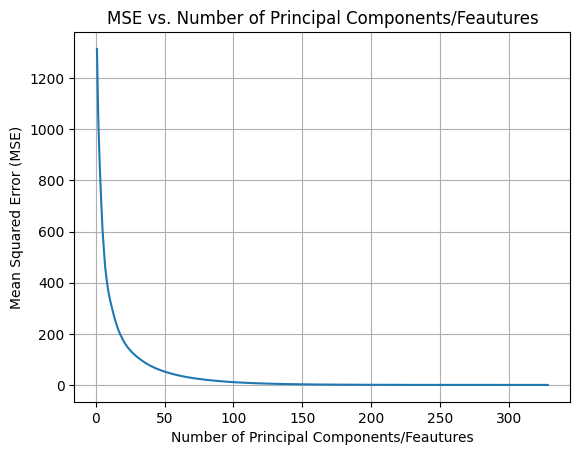

In [19]:
#plot the mse_list

plt.plot(range(1, 329), mse_list)
plt.xlabel('Number of Principal Components/Feautures')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Principal Components/Feautures')
plt.grid(True)
plt.show()



1. The understanding we gain here is as the number of feautures increase, the mean sqaured error actually decreases - This tells the clarity of image is improving.
2. Here we are calulating the mean squared error difference between the original image of lenna which is *330 * 330* and the reconstructed image of lenna by considering only 5 feautures which is also a matrix of  *330 * 330*.







In [21]:
!git clone https://github.com/Shreyaaa-11/UnderstandingPCA.git

Cloning into 'UnderstandingPCA'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


cp: cannot stat '/content/UnderstandingPCA.ipynb': No such file or directory
